# ISYE 6740 Fall 2020
# Homework 2

##### By: Da Yang (dyang347@gatech.edu)



## 1. PCA: Food consumption in European countries [50 points]

The data **food-consumption.csv** contains 16 countries in Europe and their consumption for 20 food items, such as tea, jam, coffee, yogurt, and others. We will perform principal component analysis to explore the data. In this question, please implement PCA by writing your own code (you can use any basic packages, such as numerical linear algebra, reading data, in your file).

First, we will perform PCA analysis on the data by treating each country's food consumption as their "feature" vectors. In other words, we will find weight vectors to combine 20 food-item consumptions for each country.  

### 1.1 
(10 points) For this problem of performing PCA on countries by treating each country's food consumption as their "feature" vectors, explain how the data matrix is set-up in this case (e.g., the columns and the rows of the matrix correspond to what). 

#### Answer:
The data is showing 20 food items food consumptions by 16 countries. The PCA is on contries by treating each country's food consumption as their feature vectors. In this way, the countries should be the dimensions and the food item should be the data points within country vectors.

Foe each vector $x^j$, there will be 20 features associated with 20 food items
$$ {x^1, x^2, ... x^{16}} \in R^{20}$$

And the total data point is 16 which represents for 16 countries
I constructed the matrix as $20 \times 16$. The row count 20 as the features, and column count 16 as data point

Then it will create the covariance matrix as $20 \times 20$ later to calculate the eigen vectors and eigen values associated with the 20 food item features.

<hr>

### 1.2
(10 points) Suppose we aim to find top $k$ principal components. Write down the mathematical optimization problem for solving this problem (i.e., PCA optimization problem). Show why the first principal component is obtained by using a weight vector corresponding to the eigenvectors associated with the largest eigenvalue. Explain how to find the rest of the principal components. 




#### Answer: Formulate PCA optimization problem

Step1: Given 16 data points, $ {x^1, x^2, ... x^{16}} \in R^{20}$, with mean $\mu = \frac{1}{m}\sum^{m}_{i=1}x^i$ <br>

Step2: Find a direction $w \in R^20$ where $||w|| \leq 1$ <br>
In the direction of $w$, the data will have the maximized variance. 

$$max \frac{1}{m}\sum(w^Tx^i-w^T\mu)^2$$

$$max \frac{1}{m}\sum(w^T(x^i-\mu))^2$$

$$max \frac{1}{m}\sum(w^T(x^i-\mu))(w^T(x^i-\mu))^T$$

$$max \frac{1}{m}\sum(w^T(x^i-\mu))((x^i-\mu)^Tw)$$

$$max \ w^T(\frac{1}{m}\sum(x^i-\mu)(x^i-\mu))w$$

From covariance matrix $C = \frac{1}{m}\sum(x^i-\mu)(x^i-\mu)$

Now the optimization problem becomes:

$$max\  w^TCw$$

Under the condition that $||w|| \leq 1$

From Lagrangian multiplier $\lambda$ for optimization, $f(x,y)$ has the max value when $g(x,y)=c$:

$$L(w, \lambda) = w^TCw + \lambda(1-||w||^2)$$

Calculate the derivative of all variables and set as 0 to calcualte the stationary point of $L(w, \lambda)$

$$\frac{\partial L}{\partial w} =0$$

The objective function is maximized when $Cw = \lambda w$

So the optimal solution $w$ should be the eigenvector of $C$
And the objective value is $\lambda$

In this way, the largest eigenvalue $\lambda$ and associated eigenvector $w$ means it will have the largest variance along with the direction $w$. <br>

So the first principle components is computed as the best reduced representation of the data using the largest eigenvalue and the associated eigenvector

$$z^1 = w_1^T(x-\mu)/\sqrt\lambda_1$$

For the rest of the principle components,sort the eigenvalue from largest to smallest and calculated the associated eigenvector. <br>
Then calculate the principle components $$z^n = w_n^T(x-\mu)/\sqrt\lambda_n$$

<hr>

### 1.3
(10 points) Now assume $k = 2$, i.e., we will find the first two principal components for each data point. Find the weight vectors $w_1$ and $w_2$ to extract these two principal components. Plot these two weight vectors, respectively (e.g., in MATLAB, you can use stem(w) to plot the entries of a vector $w$; similar things can be done in Python). Explain if you find any interesting patterns in the weight vectors. 

#### Answer:

The first two weight vectors are shown below (Coding included in Coidng file)
They are ortho-normal and in the direction that the data has largest variance. 

Per observations from the graph and the data, the features with larger value in w1 are like garlic, olive oil and Jam. It means those items will create larger and primary variance across all 20 food items. And in the second wegithed factor, the instant coffee and crisp bread contribute more to the variance. 


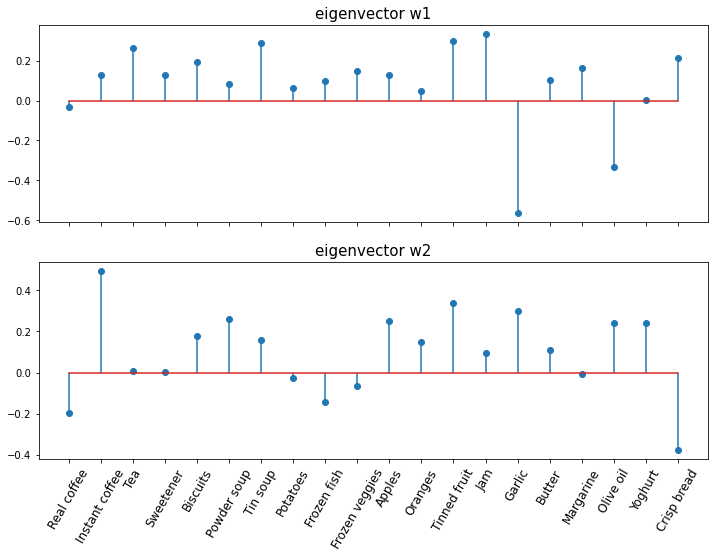

<hr>

### 1.4
(10 points) Now extract the first two principal components for each data point (thus, this means we will represent each data point using a two-dimensional vector). Draw a scatter plot of two-dimensional representations of the countries using their two principal components. Mark the countries on the lot (you can do this by hand if you want). Please explain any pattern you observe in the scatter plot.

#### Answer:

Coding is included in coding file.

The plot of first two principle components are telling a lot when comparing to the map of Europe.
Without any clustering, per observations, we can see those coutries grouped together on the plot are actually grouped together too geographically. 

1. Portugal, Italy and Spain; 
2. Sweden, Denmark, Norway and Finland;
3. Belgium and Germany

Per food consumption, it makes sense that the countries close together or the people live close tends to have the same food habitats so their food consumption are close to each other too.

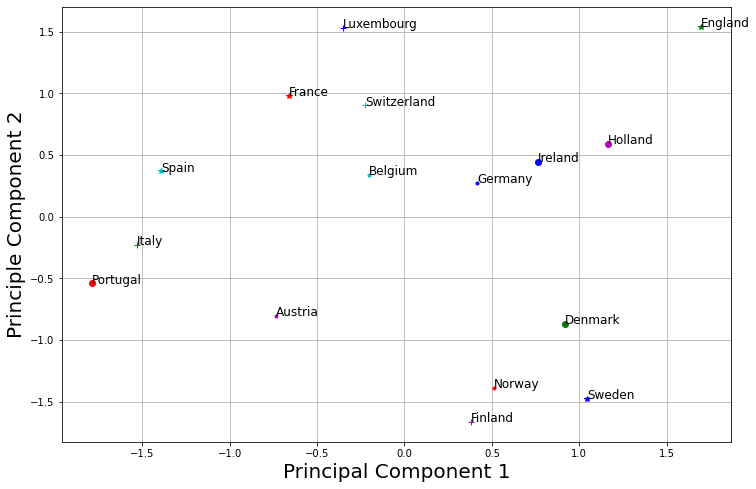

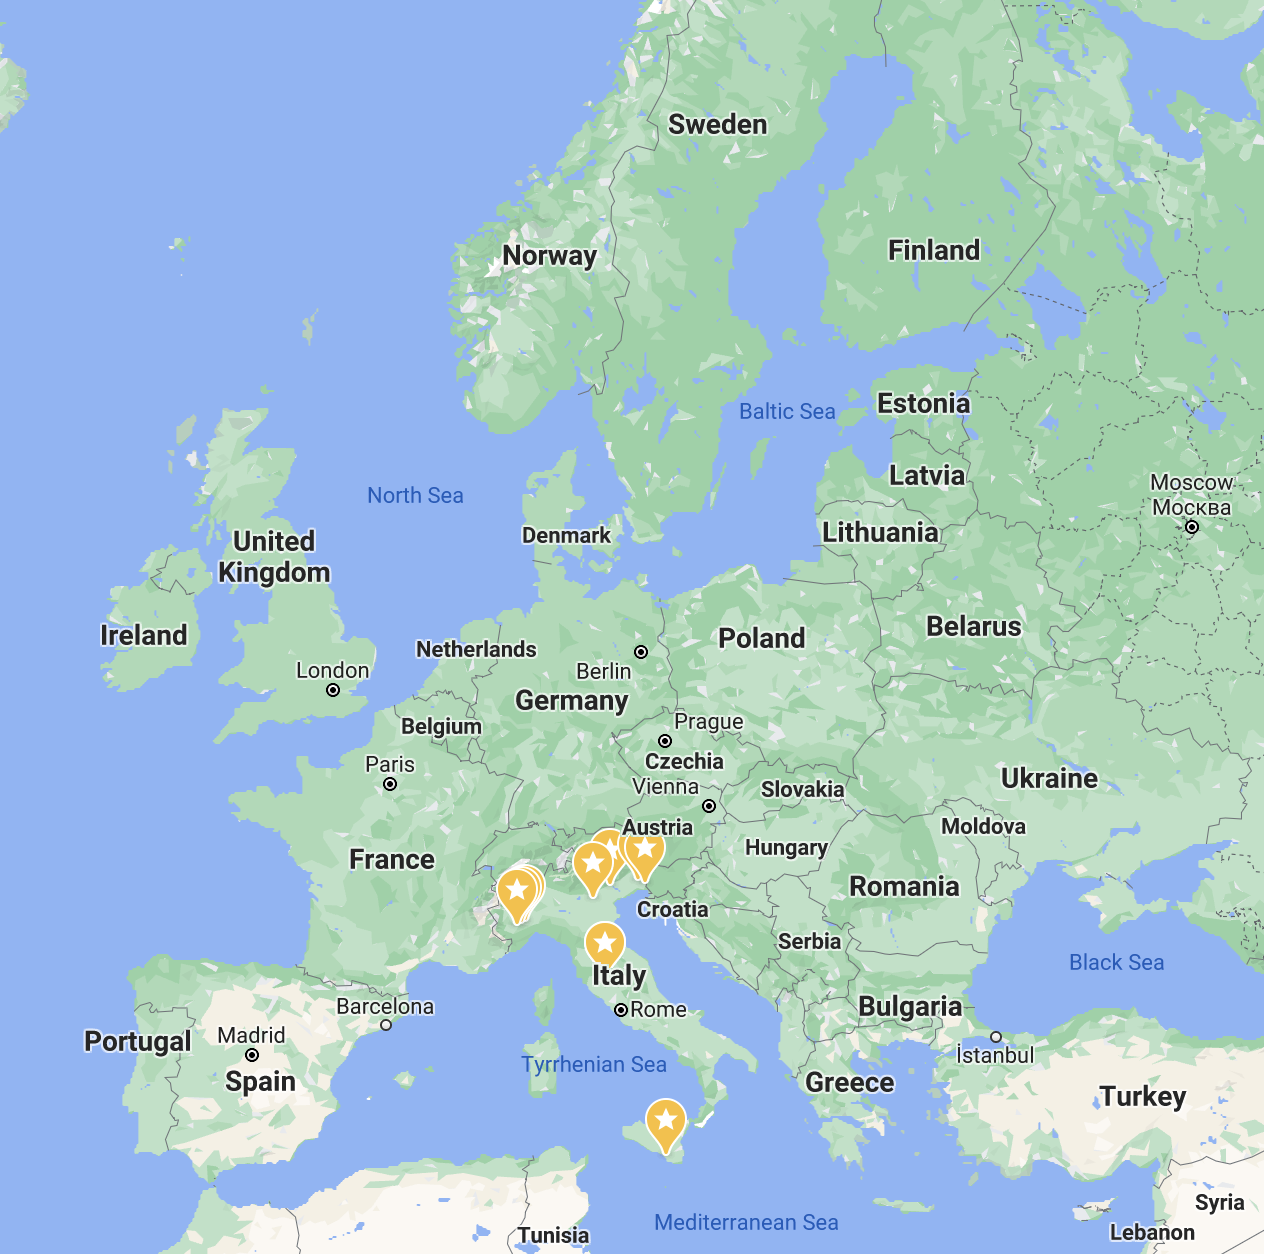

<hr>

### 1.5
Now, we will perform PCA analysis on the data by treating country consumptions as "feature" vectors for each food item. In other words, we will now find weight vectors to combine country consumptions for each food item to perform PCA another way.

(10 points) Project data to obtain their two principle components (thus, again each data point -- for each food item -- can be represented using a two-dimensional vector). Draw a scatter plot of food items. Mark the food items on the plot (you can do this by hand if you do not want). Please explain any pattern you observe in the scatter plot.


#### Answer:

From the weight vectors, we can the first weight vector are all negative and the values are close across different countries. It seems the countries are not a very good features for seperating the food items.


From the graph from the first two principle components, it is easy to see that Garlic is an outlier. 
The grouping of the plots are telling that some of the foods like frozen veggeis, frozen fish and potatoes might be cooked together by some countries so they tend to have the same pattern. Overall, using countries as features is not an indicator that as good as using food as features on countries. 

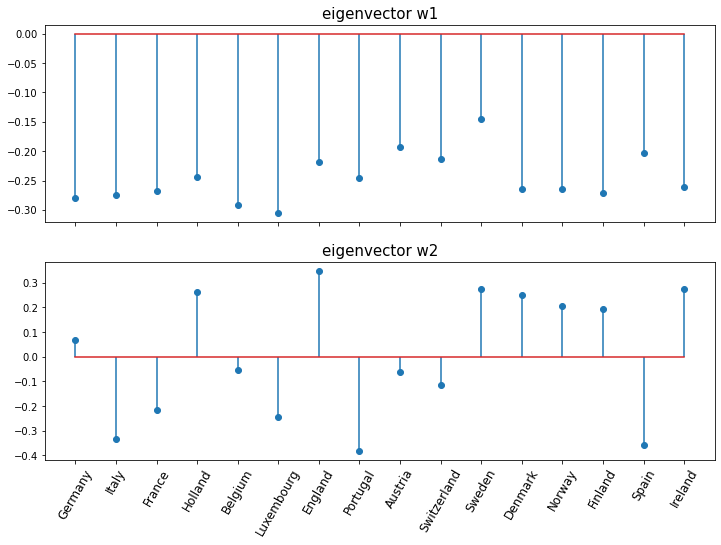

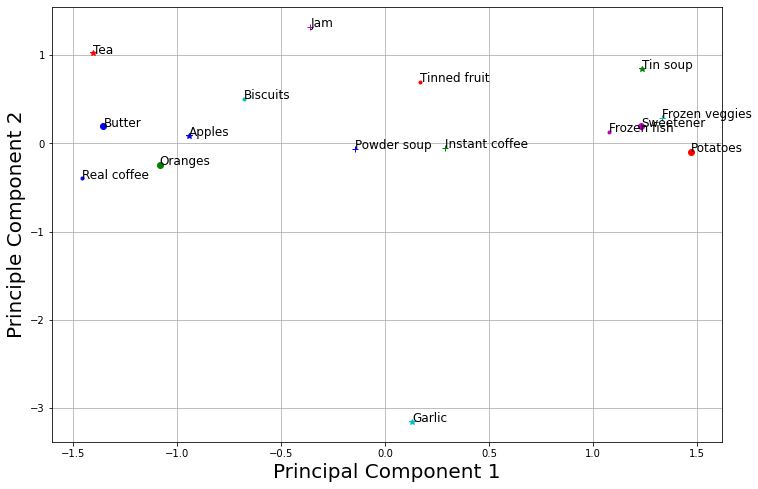

## 2. Order of faces using ISOMAP [50 points]

This question aims to reproduce the ISOMAP algorithm results in the original paper for ISOMAP, J.B. Tenenbaum, V. de Silva, and J.C. Langford, Science 290 (2000) 2319-2323 that we have also seen in the lecture as an exercise (isn't this exciting to go through the process of generating results for a high-impact research paper!) 


The file **isomap.mat** (or **isomap.dat**) contains 698 images, corresponding to different poses of the same face. Each image is given as a 64 $\times$ 64 luminosity map, hence represented as a vector in $\mathbb R^{4096}$. This vector is stored as a row in the file. [This is one of the datasets used in the original paper] In this question, you are expected to implement the ISOMAP algorithm by coding it up yourself. You may use the provided functions in **ShortestPath.zip** to find the shortest path as required by one step of the algorithm. 

Choose the Euclidean distance (i.e., in this case, a distance in $\mathbb R^{4096}$) to construct the nearest neighbor graph—vertices corresponding to the images. Construct a similarity graph with vertices corresponding to the images, and tune the threshold $\epsilon$ so that each node has *at least* 100 neighbors (this approach corresponds to the so-called $\epsilon$-Isomap).



### 2.1
(10 points) Visualize the similarity graph (you can either show the adjacency matrix, or similar to the lecture slides, visualize the graph using graph visualization packages such as Gephi (https://gephi.org) and illustrate a few images corresponds to nodes at different parts of the graph, e.g., mark them by hand or use software packages).

#### Answer: 


-- Show Sample images

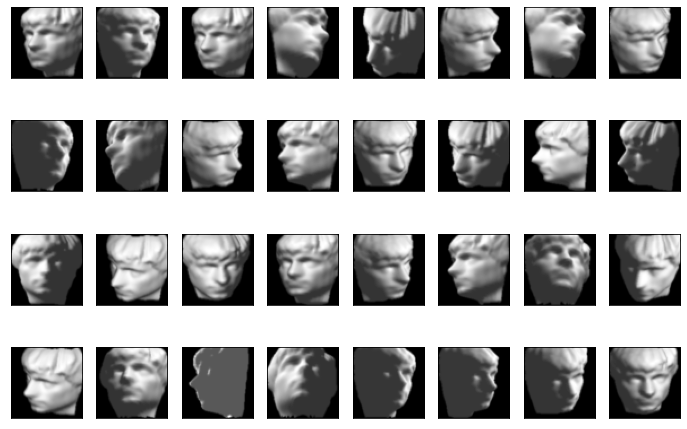


#### Used different K to see the differnet matrix

In the coding, plot adjacent matrix A and set those isolated point as 0.
In this way, when K is a smaller value like 10, the adjacent matrix is darker because less points are connected. Most of the nodes are 0 as black.

#### k = 100 as suggested from the question

-- Show shortest distance matrix D
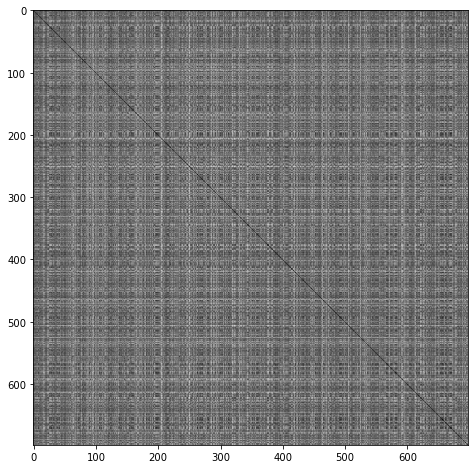


-- Show adjacent matrix 
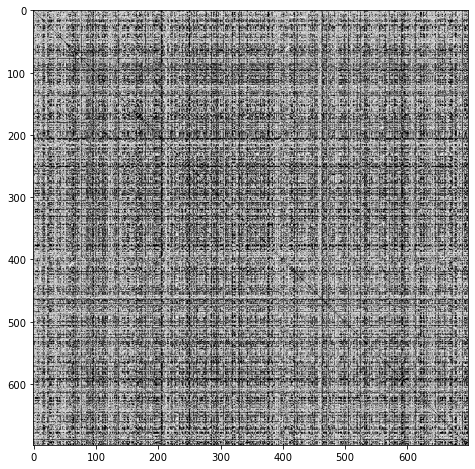

#### k = 10 as suggested from the question

-- Show shortest distance matrix D

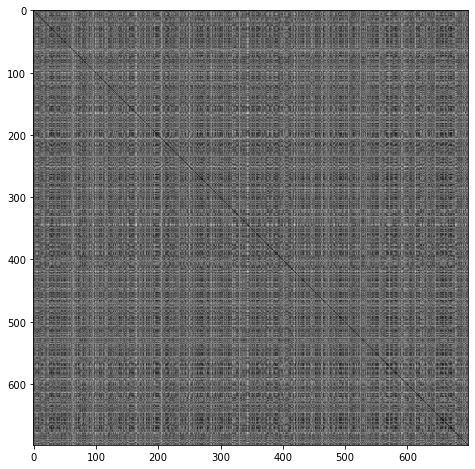

-- Show adjacent matrix 

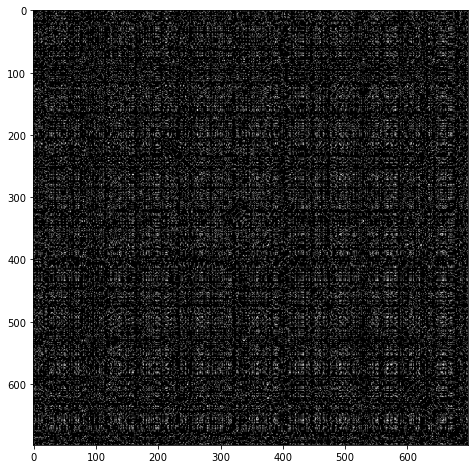

### 2.2
(20 points) Implement the ISOMAP algorithm yourself to obtain a $k = 2$-dimensional embedding. This means, each picture is represented by a two-dimensional vector ($Z$ in the lecture), which we called 'embedding' of pictures. Plot the embeddings using a scatter plot, similar to the plots in lecture slides. Find a few images in the embedding space and show what these images look like. Comment on do you see any visual similarity among them and their arrangement, similar to what you seen in the paper?

#### Answer:

Implementation of ISOMAP is included in coding file.
Calculate Z and plot in scatter plot.
The face arrangement is like the paper. 

#### K = 10


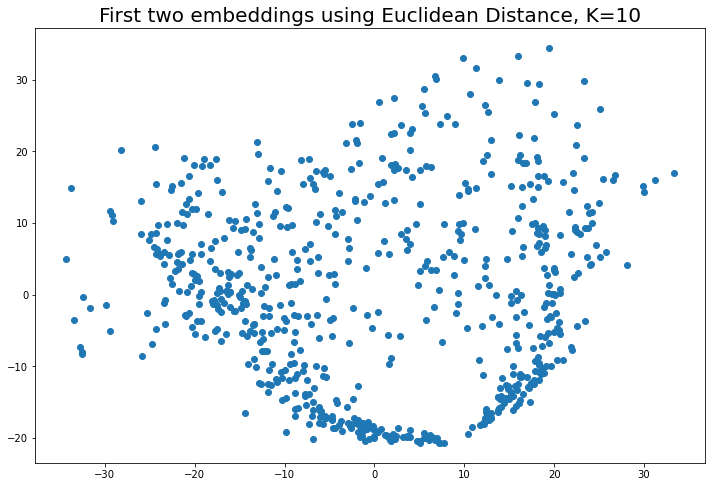

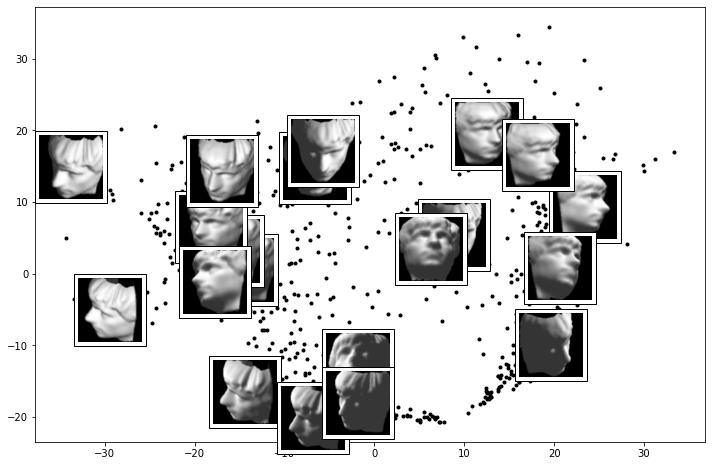

#### K = 100
The scatter plot is more intensed to each other. Where in the K=10 the grouping is more obvious. 
However, the two plots are showing very close face arrangement.

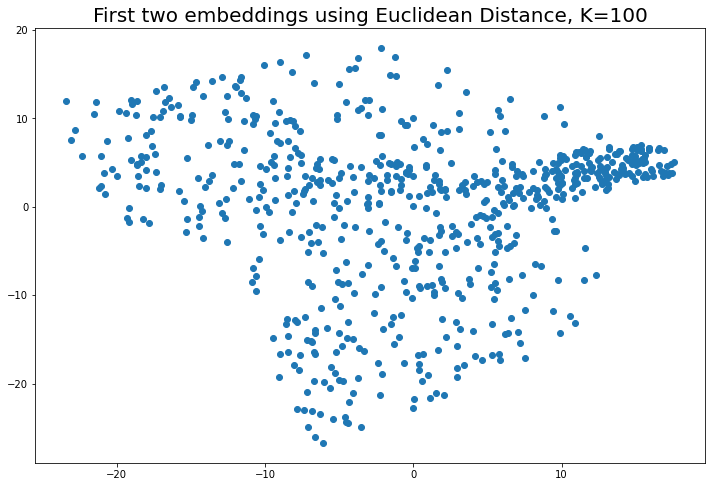

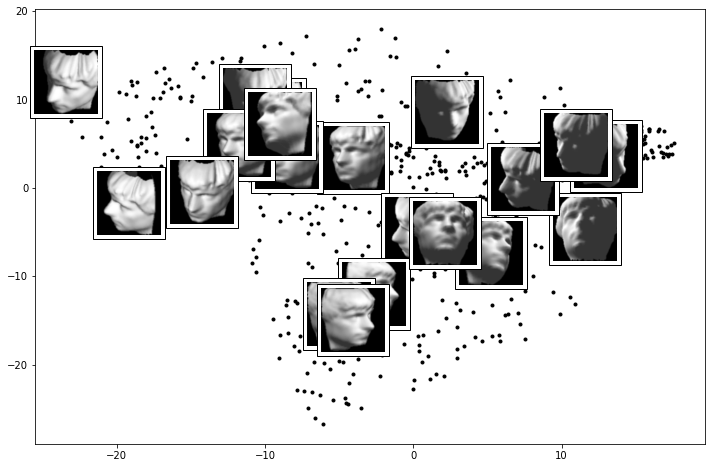

### 2.3
(10 points) Now choose $\ell_1$ distance (or Manhattan distance) between images (recall the definition from 'Clustering' lecture)). Repeat the steps above. Use $\epsilon$-ISOMAP to obtain a $k=2$ dimensional embedding. Present a plot of this embedding. Do you see any difference by choosing a different similarity measure by comparing results in Part (b) and Part (c)? 

#### Answer:

Use L1 distance the Manhattan distance to replace the distance function of 'Euclidean'.
Use K = 10 only because we can observe the plot would have a better clustering. At this point, we don't see any big difference between using Manhatten vs. Euclidean.

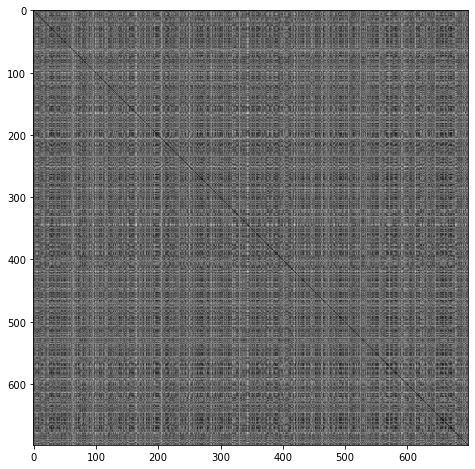

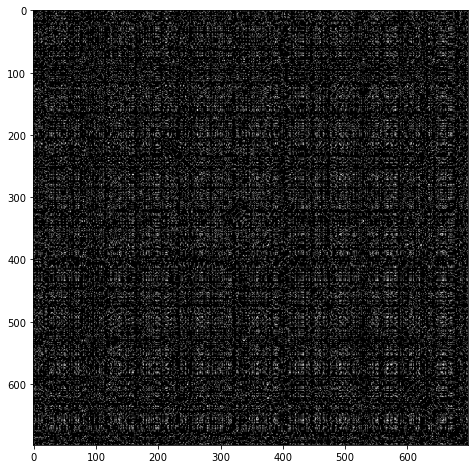

#### - The Manhattan distance also have very close scatter plot and face arrangement. But the clustering effect is not as that good as in Euclidean. 

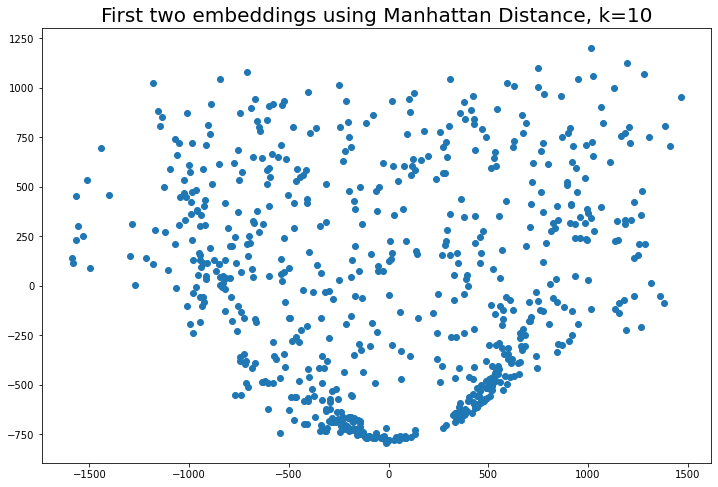

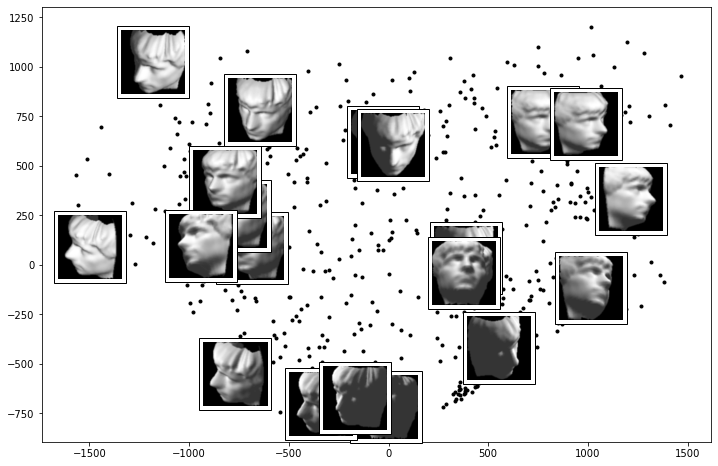

### 2.4
(10 points) Perform PCA (you can now use your implementation written in Question 1) on the images and project them into the top 2 principal components. Again show them on a scatter plot. Explain whether or you see a more meaningful projection using ISOMAP than PCA. 

#### Answer - using PCA:

Implement directly on the image array without calculating any distance.
Because the PCA is based on linear relationship, using PCA on nonlinear arrays will not have a good result. 
PCA shows some of the same face arrangement are grouping together but it is not showing a good arrangement across the different positions of faces

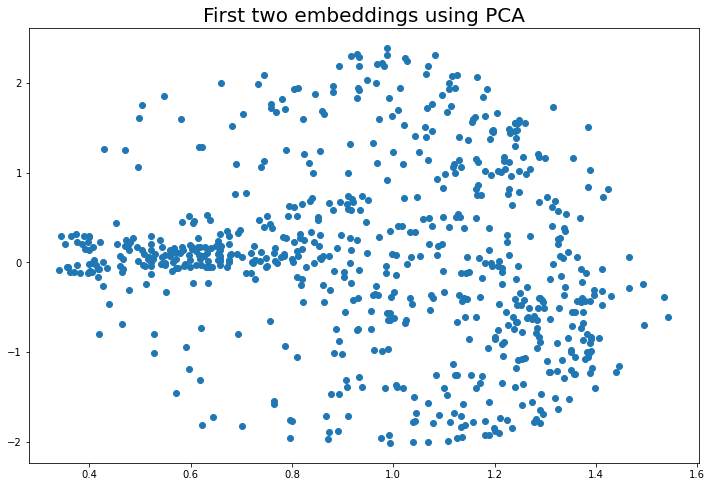

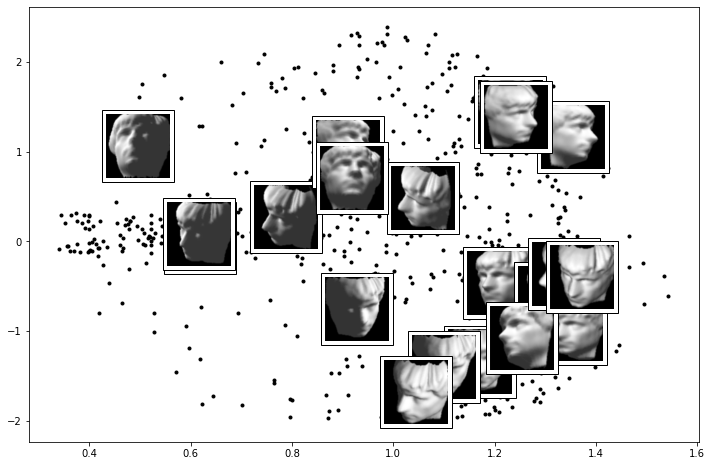

## 3. (Bonus) Eigenfaces and simple face recognition [15 points]

This question is a simplified illustration of using PCA for face recognition. We will use a subset of data from the famous Yale Face dataset. You will have to perform downsampling of the image by a factor of 4 to turn them into a lower resolution image as a preprocessing (e.g., reduce a picture of size 16-by-16 to 4-by-4). In this question, you can implement your own code or call packages. 

First, given a set of images for each person, we generate the eigenface using these images. You will treat one picture from the same person as one data point for that person. Note that you will first vectorize each image, which was originally a matrix. Thus, the data matrix (for each person) is a matrix; each row is a vectorized picture. You will find weight vectors to combine the pictures to extract different 'eigenfaces' that correspond to that person's pictures' first few principal components. 

### 3.1
(10 points) Perform analysis on the Yale face dataset for Subject 1 and Subject 2, respectively, using all the images EXCEPT for the two pictures named **subject01-test.gif** and **subject02-test.gif**. Plot the first 6 eigenfaces for each subject. When visualizing, please reshape the eigenvectors into proper images. Please explain can you see any patterns in the top 6 eigenfaces?

#### Answer:

Coding included in code file

For the first 6 eigenfaces of each subject, the eigenfaces are showing some key features on the face.
The first eigenface is showing mostly to describe the person. It can be used to recognize person

For the rest of the eigenfaces, they are showing major face expressions highlight. Because the images are same person with different expression, and major areas on the face like cheek, eyes and mouths are highlighted in those eigenfaces so show the variance among images.

##### Faces of subject 1

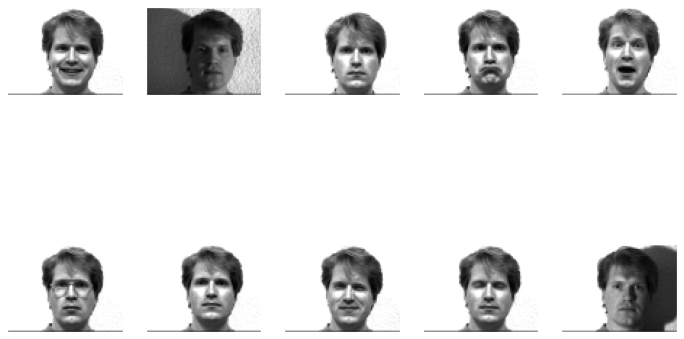

##### Faces of subject 2

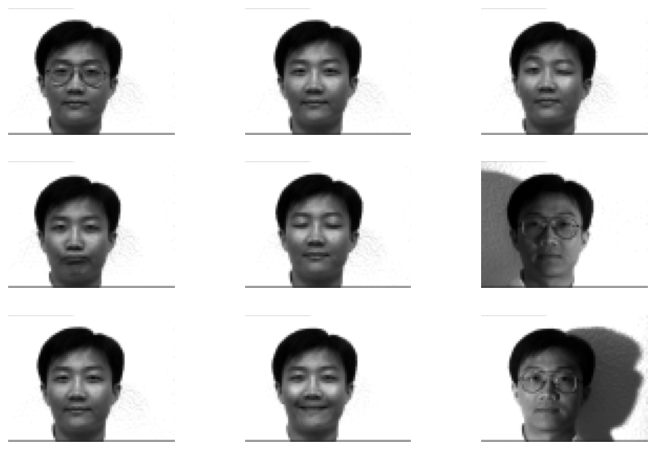

##### Eigenfaces of subject 1

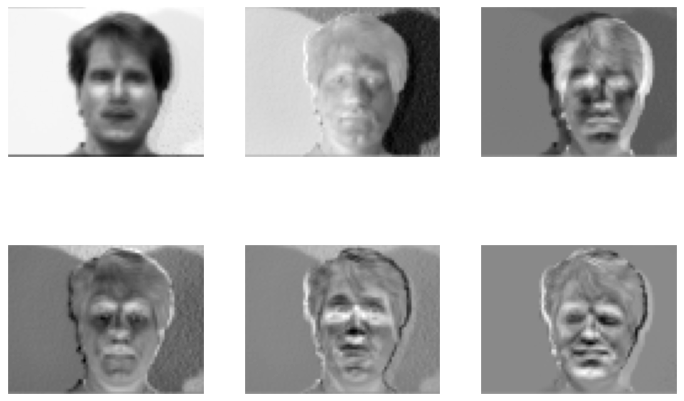

##### Eigenfaces of subject 2

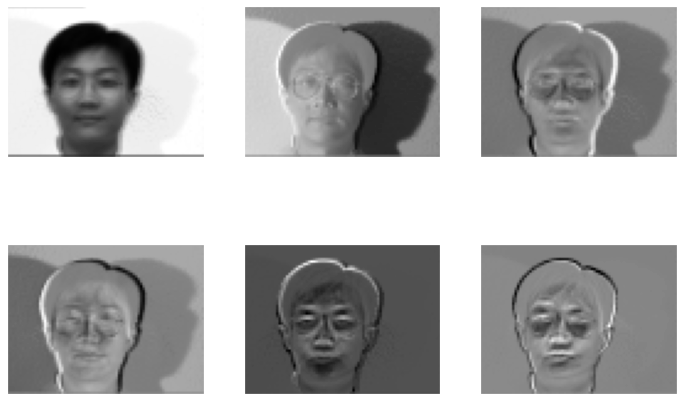

### 3.2
(5 points) Now we will perform a simple face recognition task. 

Face recognition through PCA is proceeded as follows. Given the test image **subject01-test.gif** and **subject02-test.gif**, first downsize by a factor of 4 (as before), and vectorize each image. Take the top eigenfaces of Subject 1 and Subject 2, respectively. Then we calculate the *normalized inner product score* of the 2 vectorized test images with the vectorized eigenfaces:

$$s_{ij} =\frac{\textsf{(eigenface})_i^T \textsf{(test image)}_j}{\|\textsf{(eigenface}_i)\| \cdot\|\textsf{(test image)}_j\|}$$

Report all four scores: $s_{ij}$, $i = 1, 2$, $j = 1, 2.$ Explain how to recognize the faces of the test images using these scores. Explain if face recognition can work well and discuss how we can improve it, possibly. 


#### Answer:

Screenshot of those scores from coding file

Calculate the scores usingt the top eigenfaces of each subject with the test images.
It shows obviously that the $S_{11} > S_{12}$ and $S_{12} > S_{21}$ <br>

This means we can use the eigenface for the face regconition because the score of the correct face is significantly larger than the incorrect faces.

In order to further improve the face recognition accuracy, we can either use images without downsampling to achieve higher dimensions or use more images for the eigenfaces.

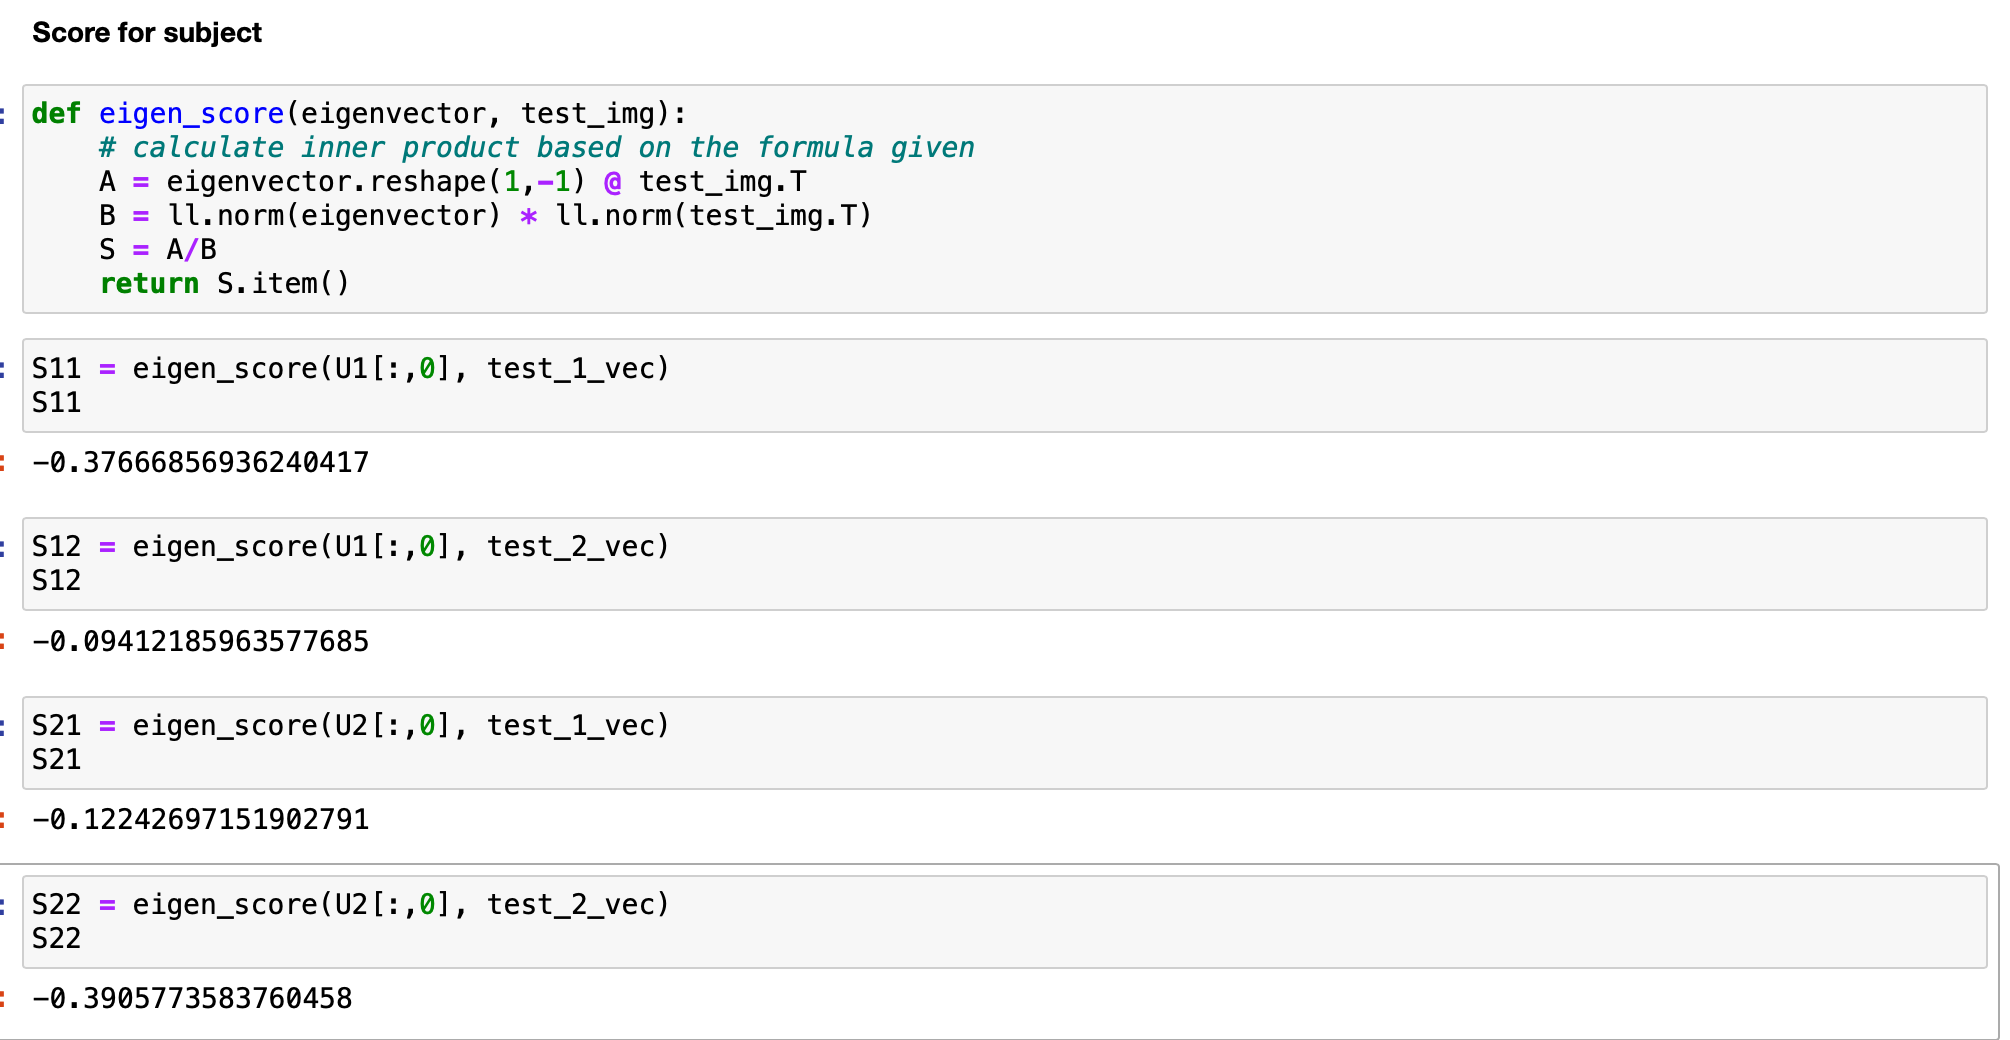